In [ ]:
#Importing.....
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
tweets = pd.read_csv('/content/sample_submission.csv', encoding = 'latin-1')
tweets.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [ ]:
#load data
train_data=pd.read_csv("/content/train.csv",encoding='latin-1')
test_data=pd.read_csv("/content/test.csv",encoding='latin-1')


In [ ]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
#Check shape of data
train_data.shape,test_data.shape

((7613, 5), (3263, 4))

In [ ]:
#independent variable
train_text=train_data.text
test_text=test_data.text

In [ ]:
#dependent variable
y=train_data.target

In [ ]:
import re

In [ ]:
#function for cleaning the text remove hashtags,punctuation and other unwanted signs
def clean_text(text):
    text=text.lower()
    text=re.sub('#','',text)
    text=re.sub('[^a-zA-Z ]','',text)
    return text

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_text.head()

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3     people receive wildfires evacuation orders in...
4    just got sent this photo from ruby alaska as s...
Name: text, dtype: object

In [ ]:
#clean text
train_text=train_text.apply(clean_text)
test_text=test_text.apply(clean_text)

In [ ]:
train_text.head()

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3     people receive wildfires evacuation orders in...
4    just got sent this photo from ruby alaska as s...
Name: text, dtype: object

In [ ]:
#lemmatize and remove stopwords from text
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemmatizer=WordNetLemmatizer()

In [ ]:
train_sequence=[]
for i in range(len(train_text)):
    words=nltk.word_tokenize(train_text.iloc[i])
    words=[lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    sent=' '.join(words)
    train_sequence.append(sent)

In [ ]:
len(train_sequence)

7613

In [ ]:
train_sequence[0]

'deed reason earthquake may allah forgive u'

In [ ]:
test_sequence=[]
for i in range(len(test_text)):
    words=nltk.word_tokenize(test_text.iloc[i])
    words=[lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    sent=' '.join(words)
    test_sequence.append(sent)

In [ ]:
len(test_sequence)

3263

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#convert text to sequence with the help of tfidf technique
tfidf=TfidfVectorizer(min_df=2,ngram_range=(1,3),max_features=10000)

In [ ]:
vectorized_train=tfidf.fit_transform(train_sequence)

In [ ]:
vectorized_train.shape

(7613, 10000)

In [ ]:
vectorized_test=tfidf.transform(test_sequence)

In [ ]:
vectorized_test.shape

(3263, 10000)

In [ ]:
#convert sequences into array
vectorized_train=vectorized_train.toarray()
vectorized_test=vectorized_test.toarray()

In [ ]:
vectorized_train[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#split out train and validation data
X_train, X_test, y_train, y_test = train_test_split(vectorized_train,y,test_size=0.2,random_state=0)

In [ ]:
#Logistic Regression for classification
classifier=LogisticRegression(C=2)

In [ ]:
#fit the training data to our Logistic Regression model
classifier.fit(X_train,y_train)

LogisticRegression(C=2)

In [ ]:
#evaluate to get validation score
classifier.score(X_test,y_test)

0.8076165462902167

In [ ]:
y_pred=classifier.predict(vectorized_test)

In [ ]:
id=test_data.id

In [ ]:
output_df=pd.DataFrame({'id':id,"target":y_pred})

In [ ]:
output_df.to_csv('submission.csv',index=False)

In [ ]:
test_data.iloc[0]

id                                           0
keyword                                    NaN
location                                   NaN
text        Just happened a terrible car crash
Name: 0, dtype: object

In [ ]:
#testing function
def predict_result(text):
    text=text.lower()
    text=re.sub('#','',text)
    text=re.sub('[^a-zA-Z ]','',text)
    words=nltk.word_tokenize(text)
    words=[lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    sentence=' '.join(words)
    temp=[sentence]
    temp1=tfidf.transform(temp)
    result=classifier.predict(temp1)
    return result[0]

In [ ]:
predict_result("Just happened a terrible car crash")

1

In [ ]:
import pickle

In [ ]:
#save classifier to load in our flask server
pickle.dump(classifier,open('disClassifier.pkl','wb'))

In [ ]:
#save tfidf object to load in our flask server
pickle.dump(tfidf,open('tfidf.pkl','wb'))

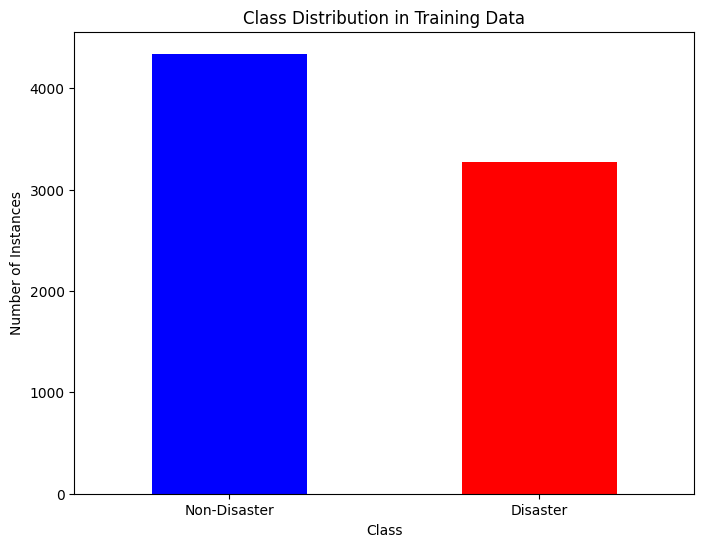

In [ ]:
import matplotlib.pyplot as plt

class_counts = train_data['target'].value_counts()

plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Class Distribution in Training Data')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.xticks([0, 1], ['Non-Disaster', 'Disaster'], rotation=0)
plt.show()


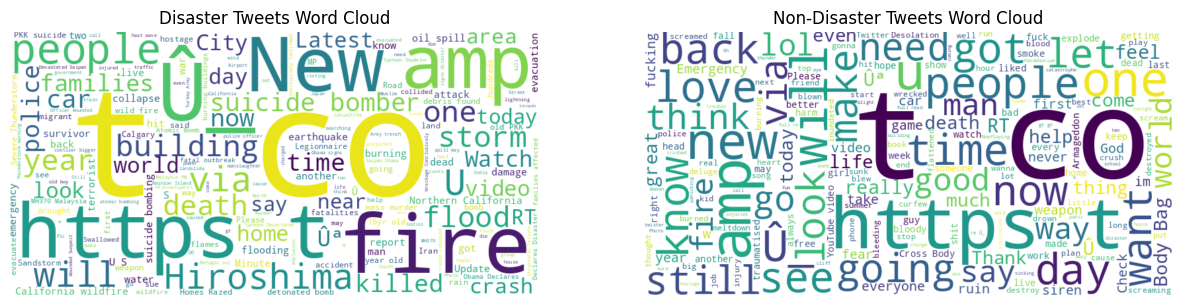

In [ ]:
from wordcloud import WordCloud

disaster_tweets = ' '.join(train_data[train_data['target'] == 1]['text'])
non_disaster_tweets = ' '.join(train_data[train_data['target'] == 0]['text'])

disaster_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(disaster_tweets)
non_disaster_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(non_disaster_tweets)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.imshow(disaster_wordcloud, interpolation='bilinear')
plt.title('Disaster Tweets Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(non_disaster_wordcloud, interpolation='bilinear')
plt.title('Non-Disaster Tweets Word Cloud')
plt.axis('off')

plt.show()


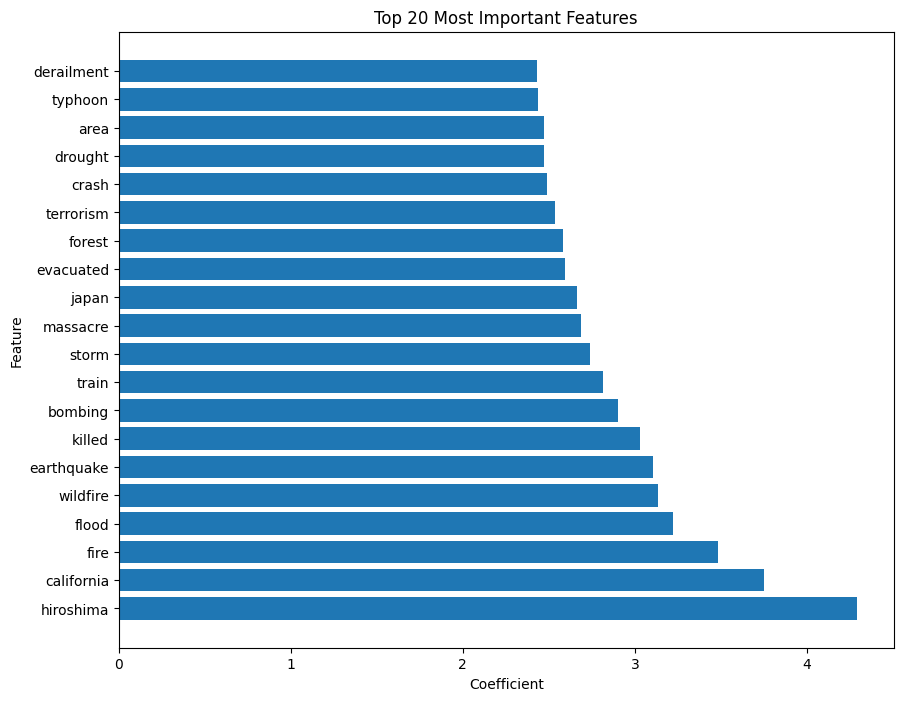

In [ ]:
feature_names = tfidf.get_feature_names_out()
coefficients = classifier.coef_[0]

feature_coefficients = list(zip(feature_names, coefficients))
feature_coefficients.sort(key=lambda x: x[1], reverse=True)

top_features = feature_coefficients[:20]

plt.figure(figsize=(10, 8))
plt.barh(range(len(top_features)), [coef for _, coef in top_features], align='center')
plt.yticks(range(len(top_features)), [feat for feat, _ in top_features])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 20 Most Important Features')
plt.show()


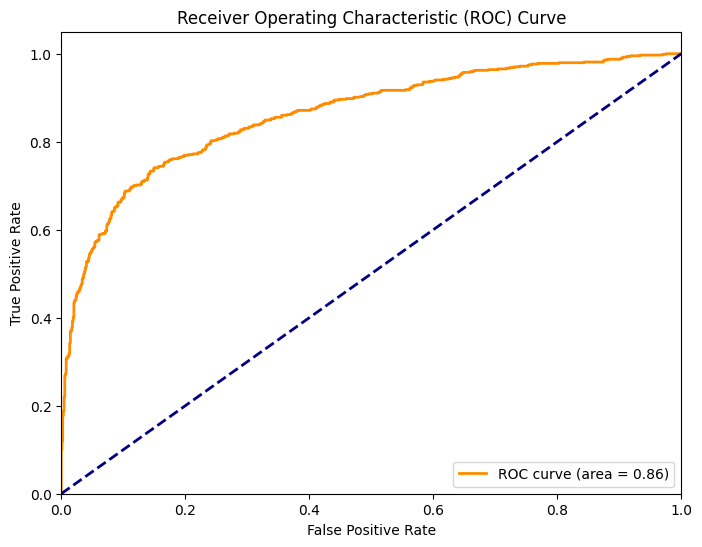

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = classifier.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(vectorized_train, y, test_size=0.2, random_state=42)

classifier.fit(X_train, y_train)

validation_accuracy = classifier.score(X_val, y_val)

test_accuracy = classifier.score(vectorized_test, y_pred)

accuracy_scores = {
    "Step": ["Validation", "Test"],
    "Accuracy": [validation_accuracy, test_accuracy]
}

accuracy_df = pd.DataFrame(accuracy_scores)

print(accuracy_df)


         Step  Accuracy
0  Validation  0.795798
1        Test  0.940239
